#  Salary Data Analysis¶
## Author: Bongani Ngcongolo
## Date: 2025-11-25
### This notebook contains an exploratory data analysis (EDA) of the monthly salary data. The goal is to clean, explore, and extract insights to determine the salary distribution to employees acrosss different departments.

In [58]:
# Importing all the neccessary libraries to clean and explore data

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
# Reading th data using pandas

df = pd.read_csv(r"C:\Users\ngcon\OneDrive\Apps\JN\employee_salary_dataset.csv")

In [59]:
# First 5 rows of the data

df.head()

,EmployeeID,Name,Department,Experience_Years,Education_Level,Age,Gender,City,Monthly_Salary
0,1,Employee_1,Marketing,15,Master,53,Female,Delhi,111416
1,2,Employee_2,Operations,7,Bachelor,25,Female,Bangalore,95271
2,3,Employee_3,IT,12,High School,51,Female,Hyderabad,69064
3,4,Employee_4,Operations,8,PhD,44,Male,Delhi,95091
4,5,Employee_5,Operations,15,Master,36,Female,Delhi,132450


In [60]:
# Last 5 rows of the data

df.tail()

,EmployeeID,Name,Department,Experience_Years,Education_Level,Age,Gender,City,Monthly_Salary
45,46,Employee_46,HR,3,PhD,54,Female,Hyderabad,88208
46,47,Employee_47,Finance,3,Master,22,Female,Delhi,58828
47,48,Employee_48,Operations,1,High School,40,Male,Chennai,43711
48,49,Employee_49,Finance,5,PhD,23,Female,Hyderabad,28420
49,50,Employee_50,Marketing,10,High School,47,Female,Bangalore,121752


In [61]:
# Checking for null/ na values

df.isna().sum()

EmployeeID          0
Name                0
Department          0
Experience_Years    0
Education_Level     0
Age                 0
Gender              0
City                0
Monthly_Salary      0
dtype: int64

In [62]:
# Information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        50 non-null     int64 
 1   Name              50 non-null     object
 2   Department        50 non-null     object
 3   Experience_Years  50 non-null     int64 
 4   Education_Level   50 non-null     object
 5   Age               50 non-null     int64 
 6   Gender            50 non-null     object
 7   City              50 non-null     object
 8   Monthly_Salary    50 non-null     int64 
dtypes: int64(4), object(5)
memory usage: 3.6+ KB


In [63]:
# Brief statistical analysis of the dataset

df.describe()

,EmployeeID,Experience_Years,Age,Monthly_Salary
count,50.00000,50.000000,50.000000,50.0000
mean,25.50000,9.900000,39.760000,82288.8000
std,14.57738,5.349995,11.539745,33521.4379
min,1.00000,1.000000,22.000000,28420.0000
25%,13.25000,5.250000,28.250000,59424.0000
50%,25.50000,10.000000,43.500000,73890.5000
75%,37.75000,14.750000,49.000000,107219.0000
max,50.00000,19.000000,57.000000,149123.0000


In [64]:
# Finding the sum of dupricated value if there are any

df.duplicated().sum()

np.int64(0)

# The data is clean, it has no duplicates, null cells and the data types are in a correct format.


In [65]:
# Checking the different Departments

df["Department"].unique()

array(['Marketing', 'Operations', 'IT', 'Finance', 'HR'], dtype=object)

In [66]:
# Checking the different Education Levels accrosss all employess

df["Education_Level"].unique()

array(['Master', 'Bachelor', 'High School', 'PhD'], dtype=object)

In [67]:
# Checking the different places that the employees reside in

df["City"].unique()

array(['Delhi', 'Bangalore', 'Hyderabad', 'Mumbai', 'Chennai'],
      dtype=object)

In [68]:
#Finding the number of employees that reside in each city
employee_demographics = df['City'].value_counts()
employee_demographics

City
Delhi        15
Hyderabad    12
Bangalore    11
Mumbai        7
Chennai       5
Name: count, dtype: int64

In [69]:
# Grouping all total montly salary by all the departments to seee which deparment gets the most funds on a monthly basis.

Dept_Salaries = (df.groupby(by ="Department")["Monthly_Salary"].sum().sort_values(ascending=False))
Dept_Salaries

Department
Marketing     1253601
Operations     842399
IT             765205
Finance        672619
HR             580616
Name: Monthly_Salary, dtype: int64

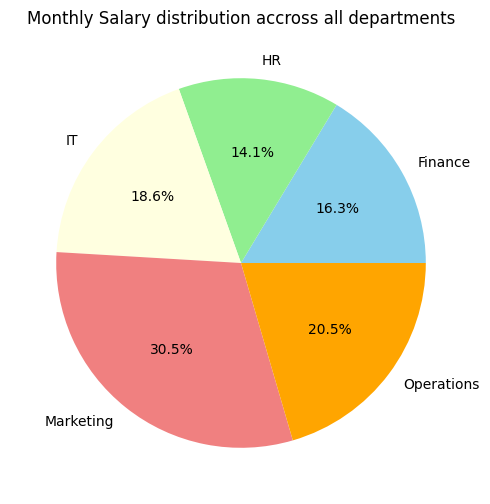

In [70]:
# Visualizing the sum of salaries accross all departments
plt.figure(figsize=(6,6)) 


df.groupby(by='Department')["Monthly_Salary"].sum().plot.pie(autopct='%1.1f%%',colors=['skyblue','lightgreen','lightyellow','lightcoral', 'orange'])
plt.ylabel('')
plt.title('Monthly Salary distribution accross all departments')
plt.show()

In [71]:
# How many ecmployees are in each department 
employee_per_dept = df['Department'].value_counts()
employee_per_dept

Department
Marketing     13
Operations    10
IT            10
Finance       10
HR             7
Name: count, dtype: int64

In [72]:
experience_by_dept = df.groupby("Department").agg(total_experience_years = ("Experience_Years", "sum"))

experience_by_dept = experience_by_dept.sort_values(by="total_experience_years", ascending=False).reset_index()
experience_by_dept


,Department,total_experience_years
0,Marketing,167
1,IT,108
2,Operations,87
3,Finance,78
4,HR,55


In [73]:
# Checking for pay gaps between male an female employees based on their experience.
df.groupby("Gender").agg( # grouping genders
    
    No_of_employees = ("EmployeeID","count"), # Counting the number of males and females
    total_experience = ("Experience_Years", "sum"), # Adding up their experience
    net_montly_salary = ("Monthly_Salary","sum") # Summing up their monthle salaries.
).reset_index()

,Gender,No_of_employees,total_experience,net_montly_salary
0,Female,27,270,2357267
1,Male,23,225,1757173


In [74]:
# Grouping the dataset by the columns mentioned below and finding the mean of their Monthly Salaries and making the output to be a dataframe.
edu_sal = df.groupby(["Education_Level", "Experience_Years", "Gender", "Department"])["Monthly_Salary"].mean().reset_index()

# Rounding off the mean to avoid multiple trailing decimals
edu_sal["Monthly_Salary"] = edu_sal["Monthly_Salary"].round(0)

# Sorting the  mean Monthly salaries to be in ascending order so to see who is a the top of the earners list.
edu_sal = edu_sal.sort_values(by="Monthly_Salary", ascending=False)

edu_sal

,Education_Level,Experience_Years,Gender,Department,Monthly_Salary
29,Master,9,Male,Operations,149123.0
43,PhD,8,Male,Marketing,141381.0
7,Bachelor,15,Female,HR,134616.0
13,High School,8,Female,HR,132455.0
35,Master,15,Female,Operations,132450.0
31,Master,13,Male,IT,130983.0
28,Master,9,Male,Marketing,127946.0
17,High School,16,Male,Marketing,122888.0
14,High School,10,Female,Marketing,121752.0
3,Bachelor,8,Female,IT,119660.0


In [75]:
#Copying the dataset in order to changes on it that will not affect the main csv file.

dataset = df.copy()

In [76]:
# Importting the label encoder module to change categorical columns to numeric columns
from sklearn.preprocessing import LabelEncoder

# These are the categorcal columns to be converted to numerical columns.
categorical_columns = ['Gender', 'Education_Level', 'Department']

# This for loo[ goes through the list of categorical columns
for col in categorical_columns:
    
    le = LabelEncoder()      # Creates a new encoder for each column
    
    #Convert text categories into numbers so that the model can understand them.
    dataset[col] = le.fit_transform(dataset[col])


In [77]:
# Dropping the columns that we do not need.
num_data = dataset.drop(["Name", "City"], axis=1, inplace=True)
num_data

In [78]:
dataset.head()

,EmployeeID,Department,Experience_Years,Education_Level,Age,Gender,Monthly_Salary
0,1,3,15,2,53,0,111416
1,2,4,7,0,25,0,95271
2,3,2,12,1,51,0,69064
3,4,4,8,3,44,1,95091
4,5,4,15,2,36,0,132450


In [79]:
# Separating the dependent and independent variables
X = dataset[["Experience_Years", "Education_Level", "Department", "Age", "Gender"]]  # Independent variables

y = dataset["Monthly_Salary"]  # Dependent variables

In [80]:
# Importing all the ML libraries that are going to be used 

from sklearn.model_selection import train_test_split # Split and train data
from sklearn.linear_model import LinearRegression # Create the model
from sklearn.metrics import mean_absolute_error, r2_score # Evaluate the model


In [81]:
# 20% of the data will be used for testing and 80 % of the data will be used for training.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [82]:
# Training the model
model = LinearRegression()
model.fit(X_train, y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [83]:
# Testing the model
y_pred = model.predict(X_test)
y_pred

array([74010.58633265, 88501.80016992, 95135.27276331, 82780.42879573,
       95435.1067366 , 81630.59214437, 93116.43914089, 80318.97269387,
       80839.16874139, 83818.85795388])

In [84]:
# Printing the Intercepts and the coefficients of the slopes
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 84778.18713273767
Coefficients: [   410.72197158  -1490.6107005    2954.34820707    -31.71185847
 -12375.71245093]


In [85]:
# Evaluating the accuracy of the model

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 33216.01521165968
R²: -0.18654889573448274


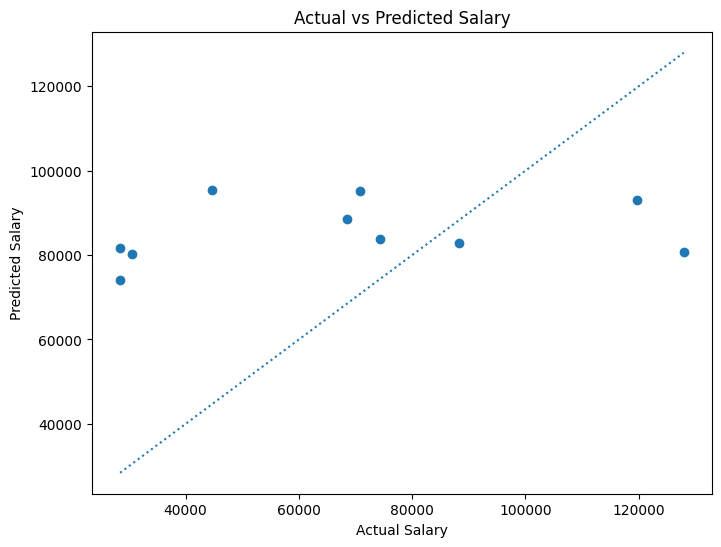

In [86]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle=':')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()

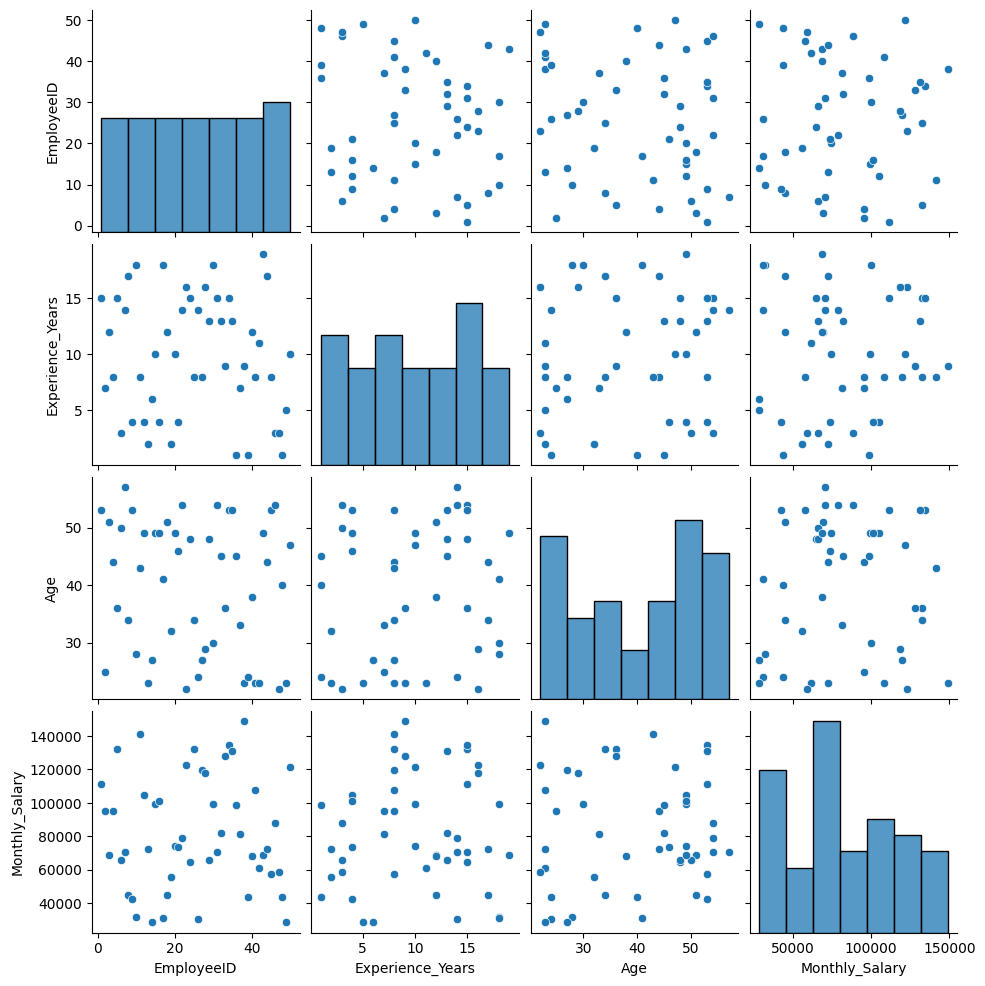

In [87]:
sns.pairplot(df)
plt.show()

# From the analysis and predictions that were done for this dataset, I can confidently conclude that this company has no specific salary model that they use, high level of educaation does not guarantee high montly salary, age, department, city and experience also do not play any significant role in how the company allocates salaries to employees.